# Importation librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
sns.set(style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data importation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_fraude = pd.read_csv("drive/My Drive/Datasets/Fraud_Data.csv")
df_Ipaddress = pd.read_csv("drive/My Drive/Datasets/IpAddress_to_Country.csv")

# Data exploration

In [4]:
#Voir les dimensions
print(df_fraude.shape) 

#Voir un sous echantillon des données
df_fraude.head() 

(151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
#Les informations sur les meta données
df_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
#Les ID dupliquees
print("ID users")
print(df_fraude['user_id'].unique())
print(len(df_fraude['user_id'].unique()))

print(" ")
print("ID device")
print(df_fraude['device_id'].unique())
print(len(df_fraude['device_id'].unique())) ##Il semble il y avoir les doublons avec les devices

ID users
[ 22058 333320   1359 ... 368416 207709 138208]
151112
 
ID device
['QVPSPJUOCKZAR' 'EOGFQPIZPYXFZ' 'YSSKYOSJHPPLJ' ... 'LYSFABUCPCGBA'
 'MEQHCSJUBRBFE' 'ZINIADFCLHYPG']
137956


In [7]:
#Voir ID device doublons
df_fraude['device_id'].value_counts()

KIPFSCNUGOLDP    20
ITUMJCKWEYNDD    20
EQYVNEGOFLAWK    20
CQTUVBYIWWWBC    20
ZUSVMDEZRBDTX    20
                 ..
ENDTWSVBTOZYP     1
HQWWPVZGMZPUZ     1
CTNVLBXZEMUKY     1
ITAOJPXCRUSAE     1
VGBLFCEZSRUEQ     1
Name: device_id, Length: 137956, dtype: int64

In [8]:
print(df_Ipaddress.shape) #Voir les dimensions
df_Ipaddress.head() #Voir un sous echantillon des données

(138846, 3)


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [9]:
###Fusionner les deux dataframes
def get_country(ip, ip_country_dataset):
    """
    Return the name of the country based on the ip address
    """
    try:
        country = ip_country_dataset[
            (ip >= ip_country_dataset.lower_bound_ip_address) & (ip <= ip_country_dataset.upper_bound_ip_address)
        ]["country"].iloc[0]
    except:
        return "unknown"
    else:
        return country

df_fraude["country"] = df_fraude["ip_address"]
df_fraude["country"] = df_fraude["country"].apply(get_country, args=(df_Ipaddress,))

In [10]:
df_fraude.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


# Univariate analysis

### Variables quantitatives

In [11]:
##Statistiques descriptives
df_fraude[['age', 'purchase_value']].describe()

,age,purchase_value
count,151112.000000,151112.000000
mean,33.140704,36.935372
std,8.617733,18.322762
min,18.000000,9.000000
25%,27.000000,22.000000
50%,33.000000,35.000000
75%,39.000000,49.000000
max,76.000000,154.000000


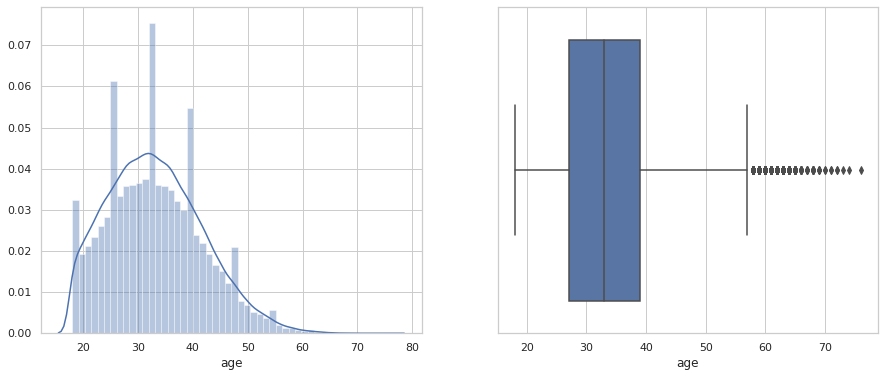

In [12]:
##Histogramme et boxplot Age
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.distplot(df_fraude.age)

plt.subplot(122)
sns.boxplot(df_fraude.age)

plt.show()

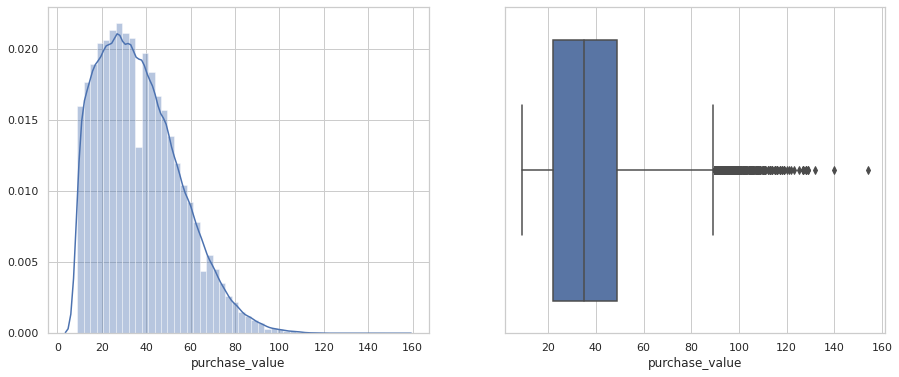

In [13]:
##Histogramme et boxplot purchase_value
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.distplot(df_fraude.purchase_value)

plt.subplot(122)
sns.boxplot(df_fraude.purchase_value)

plt.show()

## Variables qualitatives

In [14]:
print(df_fraude.columns)
df_fraude.head(2)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country'],
      dtype='object')


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States


In [ ]:
##Barplots pour source, sexe,  class, browser, country
var_cat1 = ['source', 'sex',  'class', 'browser', 'country']

##Voir Tableau des frequences
tab1 = pd.DataFrame(np.round(100*df_fraude['source'].value_counts(normalize = True), 0))
print(tab1)
print("")
tab2 = pd.DataFrame(np.round(100*df_fraude['sex'].value_counts(normalize = True), 0))
print(tab2)
print("")
tab3 = pd.DataFrame(np.round(100*df_fraude['class'].value_counts(normalize = True), 0))
print(tab3)
print("")
tab4 = pd.DataFrame(np.round(100*df_fraude['browser'].value_counts(normalize = True), 0))
print(tab4)
print("")
tab5 = pd.DataFrame(np.round(100*df_fraude['country'].value_counts(normalize = True), 0))
print(tab5)

Text(0.5, 0, 'Source')

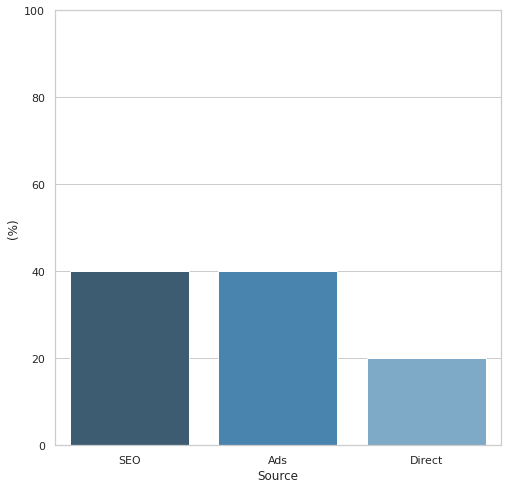

In [33]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x = tab1.index, y = tab1.source, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Source')

Text(0.5, 0, 'Sexe')

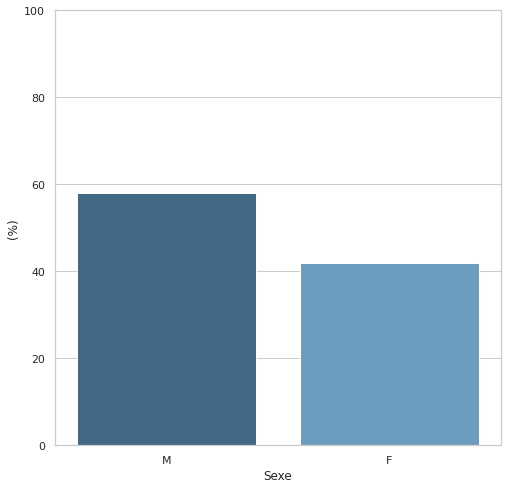

In [35]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x = tab2.index, y = tab2.sex, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Sexe')

Text(0.5, 0, 'Activité Frauduleuse')

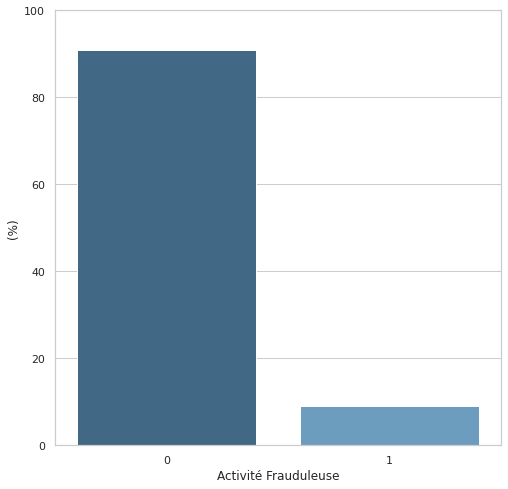

In [38]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x = tab3.index, y = tab3['class'], palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Activité Frauduleuse')

Text(0.5, 0, 'Navigateur internet')

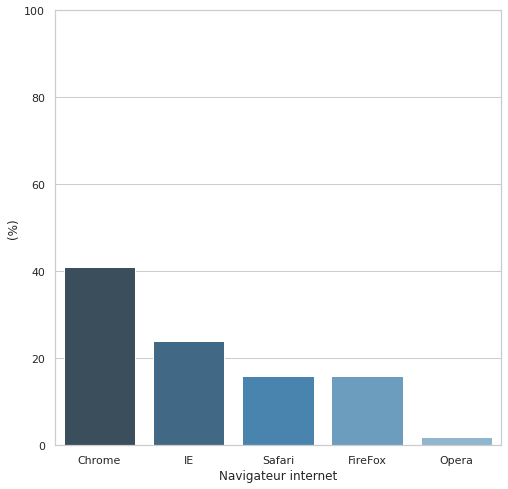

In [40]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x = tab4.index, y = tab4.browser, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Navigateur internet')

In [ ]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = tab5.index, y = tab5.country, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Pays')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)

In [77]:
tab5a = pd.DataFrame(np.round(100*df_fraude['country'].value_counts(), 0))
tab5e = pd.concat([tab5a, tab5], axis = 1)
tab5e.to_excel("Mapping_country1.xlsx")

In [57]:
##Masque pour créer un groupe de pays avec une proportion < 1%
name_country = tab5[tab5.country >= 1].index #Nom des pays avec proportion >1%

mask5 = ~df_fraude['country'].isin(name_country)

df_fraude['country_mod'] = df_fraude['country'].mask(mask5, 'Others Countries')

In [69]:
tab5b = pd.DataFrame(np.round(100*df_fraude['country_mod'].value_counts(normalize = True), 0))

In [76]:
tab5c = pd.DataFrame(np.round(100*df_fraude['country_mod'].value_counts(), 0))
tab5d = pd.concat([tab5c, tab5b], axis = 1)
tab5d.to_excel("Mapping_country.xlsx") #Exporter le fichier pour une visualisation cartographie avec Tableau

[Text(0, 0, 'United States'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'Others Countries'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Korea Republic of'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'Russian Federation'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Taiwan; Republic of China (ROC)'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'South Africa'),
 Text(0, 0, 'Switzerland')]

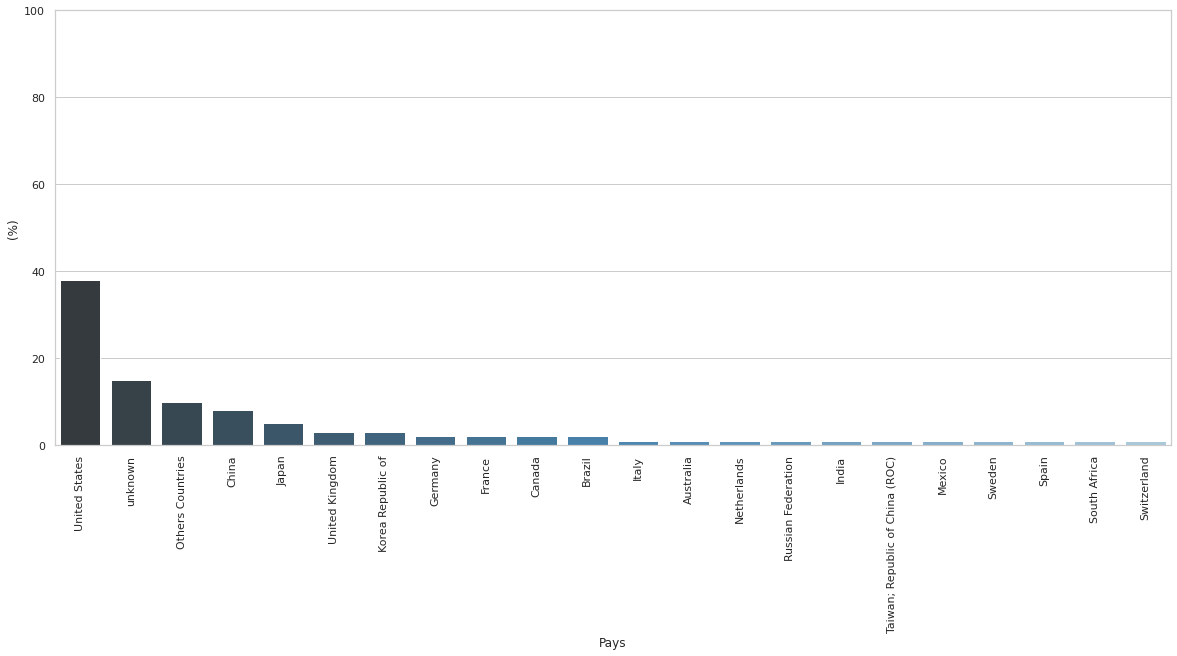

In [68]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(x = tab5b.index, y = tab5b.country_mod, palette="Blues_d")
ax.set_ylim(0, 100)
ax.set_ylabel('(%)')
ax.set_xlabel('Pays')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 90)

#Bivariate Analysis